In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from notebooks.helpers.models.embedding_model import PredictionModel
from generate_embeddings import get_wine_dataframe, get_food_dataframe
# from notebooks.helpers.prep.view_embeddings import view_embeddings_of_ingredient
from generate_pairings import compute_embedding_food_ingredients, get_the_closest_embedding, get_food_embedding_dict, get_descriptor_frequencies, get_production_wines, generate_pairing_for_ingredients, normalize_production_wines
import networkx as nx
from pyvis.network import Network
from pathlib import Path

from kg_generation import create_wine_triplets, create_variety_descriptor_triplets, create_food_triplets

%matplotlib inline


In [12]:
KG = pd.concat([create_variety_descriptor_triplets(), create_wine_triplets(), create_food_triplets()], axis=0)

In [13]:
# KG = pd.DataFrame({'head': triplets['heads'], "tail": triplets['tails'], 'edges': triplets['edges']
# })
# G=nx.from_pandas_edgelist(KG, "head", "tail", edge_key = 'labels', create_using=nx.MultiDiGraph())

G = nx.DiGraph()
for _, row in KG.iterrows():
    G.add_edge(row['head'], row['tail'], label=row['edges'])
    # G.nodes[row['tail']]['label'] = row['node_label']

In [ ]:
# for edge in G.edges(data=True):
#     print(edge)

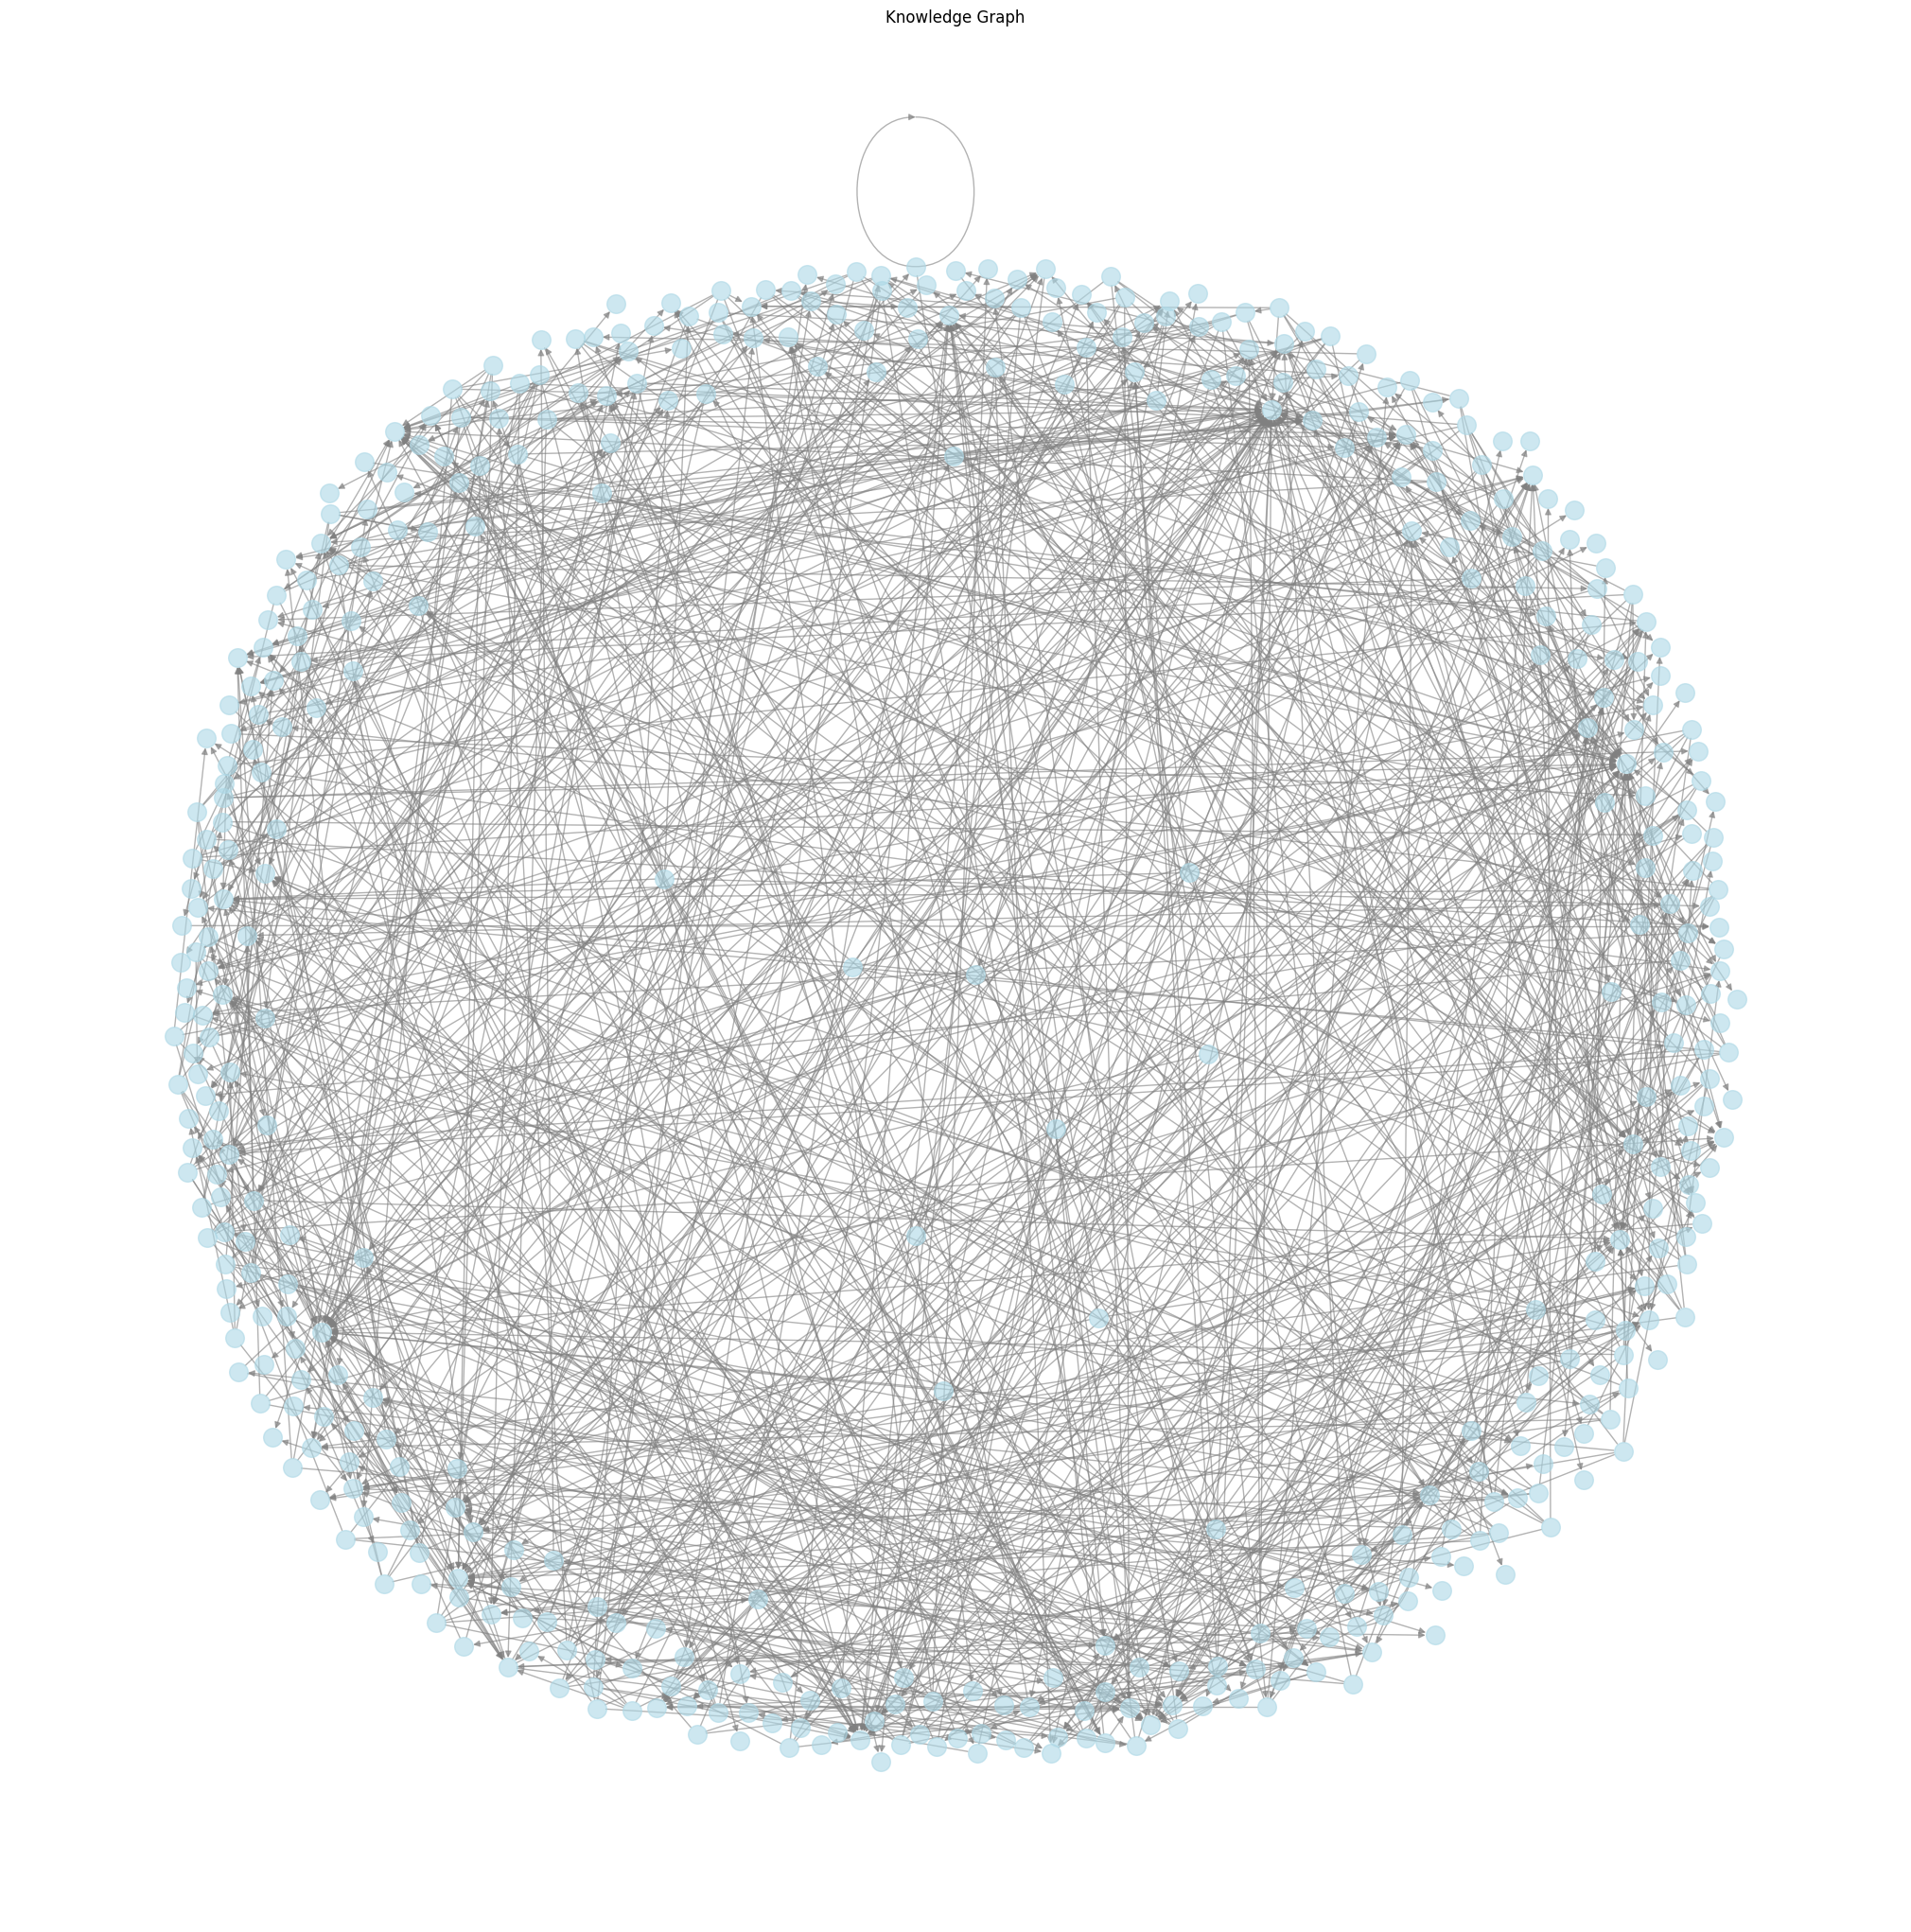

In [14]:
pos = nx.spring_layout(G, seed=42, k=1.5)
labels = nx.get_edge_attributes(G, 'label')
plt.figure(figsize=(20, 20))
nx.draw(G, pos, font_size=8, node_size=200, node_color='lightblue', edge_color='gray', alpha=0.6)
# nx.draw_networkx_edge_labels(G, pos, font_size=3, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()

In [6]:
net = Network(notebook = True, cdn_resources = "remote",
                bgcolor = "#222222",
                font_color = "white",
                height = "750px",
                width = "100%",
                select_menu = True,
                filter_menu = True,
)
net.show_buttons(filter_="physics")
net.from_nx(G)
net.show("nx.html")

nx.html


In [ ]:
# net.set_options()